In [3]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt
%matplotlib inline

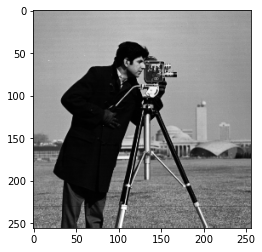

In [4]:
image = cv2.imread('./datas/cameraman.tif', 0)
plt.imshow(image, cmap='gray')

In [5]:
image.shape

(256, 256)

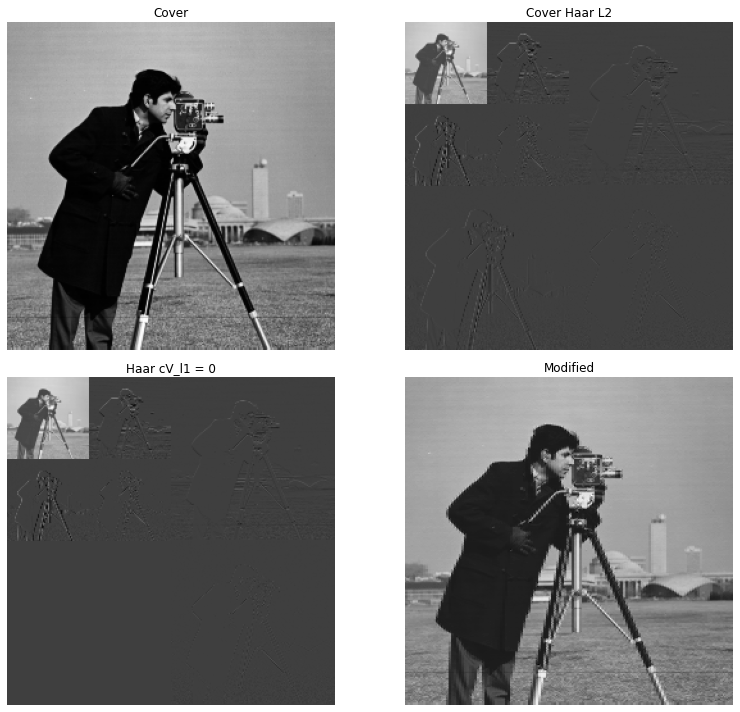

In [6]:
img_gray = cv2.imread('./datas/cameraman.tif', cv2.IMREAD_GRAYSCALE).astype(np.float32)

cA_l1, (cH_l1, cV_l1, cD_l1) = pywt.dwt2(img_gray, 'haar')
cA_l2, (cH_l2, cV_l2, cD_l2) = pywt.dwt2(cA_l1, 'haar')


# 将各个子图进行拼接，最后得到一张图
AH_l2 = np.concatenate([cA_l2, cH_l2], axis=1)
VD_l2 = np.concatenate([cV_l2, cD_l2], axis=1)
img_wt_l1 = np.concatenate([AH_l2, VD_l2], axis=0)

AH_l1 = np.concatenate([img_wt_l1, cH_l1], axis=1)
VD_l1 = np.concatenate([cV_l1, cD_l1], axis=1)
img_wt = np.concatenate([AH_l1, VD_l1], axis=0)

# print(cV_l1)
cV_l1[:, :] = 0
VD_l1 = np.concatenate([cV_l1, cD_l1], axis=1)
img_wt_marked = np.concatenate([AH_l1, VD_l1], axis=0)
img_marked = pywt.idwt2((cA_l1, (cH_l1, cV_l1, cD_l1)), 'haar')

plt.figure(figsize=(12,10))
plt.subplot(221), plt.imshow(img_gray, cmap='gray'), plt.title('Cover'), plt.axis('off')
plt.subplot(222), plt.imshow(img_wt, cmap='gray'), plt.title('Cover Haar L2'), plt.axis('off')
plt.subplot(223), plt.imshow(img_wt_marked, cmap='gray'), plt.title('Haar cV_l1 = 0'), plt.axis('off')
plt.subplot(224), plt.imshow(img_marked, cmap='gray'), plt.title('Modified'), plt.axis('off'), plt.axis('off')
plt.tight_layout()
plt.show()

(<AxesSubplot:title={'center':'Modified'}>,
 Text(0.5, 1.0, 'Modified'),
 (-0.5, 255.5, 255.5, -0.5),
 (-0.5, 255.5, 255.5, -0.5))

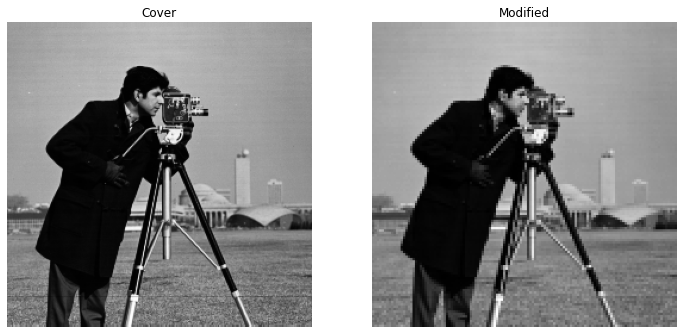

In [8]:
cH_l1[:,:], cV_l1[:,:], cD_l1[:,:] = 0, 0, 0
cH_l2[:,:], cV_l2[:,:], cD_l2[:,:] = 0, 0, 0

AH_l2 = np.concatenate([cA_l2, cH_l2], axis=1)
VD_l2 = np.concatenate([cV_l2, cD_l2], axis=1)
img_wt_l1 = np.concatenate([AH_l2, VD_l2], axis=0)

AH_l1 = np.concatenate([img_wt_l1, cH_l1], axis=1)
VD_l1 = np.concatenate([cV_l1, cD_l1], axis=1)
img_wt = np.concatenate([AH_l1, VD_l1], axis=0)

VD_l1 = np.concatenate([cV_l1, cD_l1], axis=1)
img_wt_marked = np.concatenate([AH_l1, VD_l1], axis=0)
img_marked = pywt.idwt2((cA_l1, (cH_l1, cV_l1, cD_l1)), 'haar')

plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(img_gray, cmap='gray'), plt.title('Cover'), plt.axis('off')
plt.subplot(122), plt.imshow(img_marked, cmap='gray'), plt.title('Modified'), plt.axis('off'), plt.axis('off')

In [9]:
k =  128**2 / 256**2
k

0.25

In [8]:
# cA_l1, cH_l1, cV_l1, cD_l1
# cA_l2, cH_l2, cV_l2, cD_l2
cA_l1.shape, cH_l1.shape, cV_l1.shape, cD_l1.shape, cA_l2.shape, cH_l2.shape, cV_l2.shape, cD_l2.shape

((128, 128),
 (128, 128),
 (128, 128),
 (128, 128),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64))

### 稀疏性

In [16]:
k = (256**2 - 128**2) / 256**2
k

0.75